In [107]:
%load_ext autoreload
%autoreload 2
from ProfileBuilder import Graphlet

from CustomRWKernel import compute_random_walk_kernel

from networkx.drawing.nx_pylab import draw_kamada_kawai, draw_spring
import matplotlib.pyplot as plt
from sklearn import svm, datasets

import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
graphlet = Graphlet('data/annotated-trace.csv')

In [125]:
X = graphlet.profile_graphlets
y = graphlet.get_graphlets_label()
y =[0 if el=='normal' else 1 for el in y]

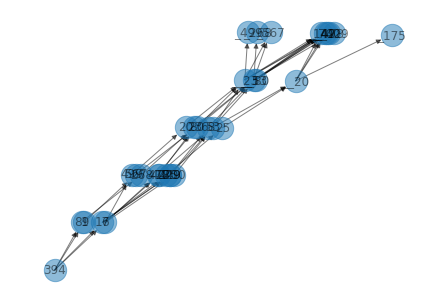

In [126]:
draw_kamada_kawai(X[0], with_labels= True, alpha = 0.5, node_size= 500)

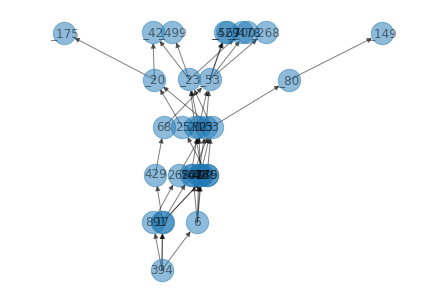

In [131]:
draw_kamada_kawai(graphlet.activity_graphlets[0], with_labels= True, alpha = 0.5, node_size= 500)

In [132]:
len(X)

1001

In [133]:
from gklearn.kernels.randomWalkKernel import randomwalkkernel

In [ ]:
randomwalkkernel(X, compute_method="conjugate", n_jobs=4)


 None edge weight specified. Set all weight to 1.


 9 graphs are removed as they don't contain edges.




reindex vertices:   0%|          | 0/992 [00:00<?, ?it/s]


reindex vertices:  43%|████▎     | 423/992 [00:00<00:00, 4228.16it/s]


reindex vertices: 100%|██████████| 992/992 [00:00<00:00, 4090.64it/s]



calculating kernels: 0it [00:00, ?it/s]

In [113]:
gram_matrix = np.zeros((len(X), len(X)))
for i in range(len(X)):
    for j in range(i,len(X)):
        gram_matrix[i][j] = compute_random_walk_kernel(X[i], X[j])
    if i % 4 == 0 : print(i)

0
4


KeyboardInterrupt: 

In [ ]:
compute_random_walk_kernel(graphlet.activity_graphlets[0], graphlet.activity_graphlets[1])

In [ ]:
#custom_kernel
clf = svm.SVC(kernel="precomputed")


In [ ]:
clf.fit(gram_matrix, y)

In [ ]:
clf.predict(gram_matrix)

In [ ]:
print(gram_matrix)

In [ ]:
for l in X:
    if 36!=len(l):print(len(l))

In [ ]:
for l